## DAY 6

Clustering - grouping the datapoints in the dataset based on the similarities between them.
k --> number of clusters

CONTINOUS VALUES -- KNN
CATEGORICAL VALUES -- LINEAR REGRESSION

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf

In [ ]:
df = pdr.get_data_yahoo('SPY','2012-01-01','2017-01-01')
df = df.dropna()
df = df[['Open','High','Low','Close']]
df.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,127.760002,128.380005,127.430000,127.500000
2012-01-04,127.199997,127.809998,126.709999,127.699997
2012-01-05,127.010002,128.229996,126.430000,128.039993
2012-01-06,128.199997,128.220001,127.290001,127.709999
2012-01-09,128.000000,128.179993,127.410004,128.020004


In [ ]:
df['Open-Close']=df.Open - df.Close
df['High-Low'] = df.High - df.Low
df= df.dropna()
X = df[['Open-Close','High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2012-01-03,0.260002,0.950005
2012-01-04,-0.500000,1.099998
2012-01-05,-1.029991,1.799995
2012-01-06,0.489998,0.930000
2012-01-09,-0.020004,0.769989


In [ ]:
Y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)

In [ ]:
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('Train_data Accuracy: %.2f' %accuracy_train)
print('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.60
Test_data Accuracy: 0.53


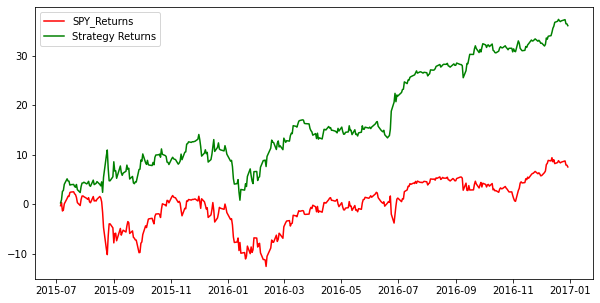

In [ ]:
df['Predicted_Signal'] = knn.predict(X)

df['SPY_Returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_SPY_Returns = df[split:]['SPY_Returns'].cumsum()*100

df['Strategy_Returns'] = df['SPY_Returns']*df['Predicted_Signal'].shift(1)
Cumulative_Strategy_Returns = df[split:]['Strategy_Returns'].cumsum()*100

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_Returns , color = 'r', label = 'SPY_Returns')
plt.plot(Cumulative_Strategy_Returns, color = 'g', label = 'Strategy Returns')
plt.legend()
plt.show()